<a href="https://colab.research.google.com/github/mrezky-mr/ASPIRE2021/blob/main/Introduction_(Weidenschilling%2C_1977a_%26_1977b).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This notebook covers Week 1 exercises, related to Weidenschilling's papers.

# Weidenschilling 1977a (Aerodynamics of solid bodies in the solar nebula)

1. Write down the force balance for a solid particle in Keplerian motion around the central star.

>$$ F_{grav.} = F_{cent.}$$

>$$ \frac{GM_{\odot}}{r^2} = \frac{V^2_k}{r} = g $$



---
2. Do the same for a parcel of gas (note: gas is also pressure supported).

From hydrostatic pressure, $ P = \rho g r $, we can convert it to

>$$ g = \frac{1}{\rho} \frac{P}{r} \implies \Delta g = \frac{1}{\rho} \frac{dP}{dr}$$

For a parcel of gas, the forces are balancing between centrifugal and gravitational + gas pressure, so that

>$$ F_{cent.} = F_{grav.} + m \cdot \Delta g $$

>$$ \frac{V_g^2}{r} = \frac{GM_{\odot}}{r^2} + \frac{1}{\rho} \frac{dP}{dr}$$

---
3. Use the assumption of an ideal gas. What is the deviation from the Kepler velocity for a gas parcel? Express this in form of $v_{gas} = v_{K} - \eta v_{K}$. Can you estimate the $\eta$?

Ideal gas law stated that
> $$PV = nRT \implies P \frac{m}{\rho} = \frac{m}{\mu}RT$$

which could be rearranged as

> $$ P = \rho \frac{RT}{\mu} = \rho \cdot C_s^2 $$

with $C_s^2$ is the isothermal sound speed. This also means that we can use the power law approximation of the pressure,

> $$ P = P_{0} \cdot \bigg( \frac{r}{r_0}\bigg)^{-n} $$

to derive the equation from before.

> $$ \frac{dP}{dr} = P_{0} \cdot r_0^n \cdot \frac{d}{dr} r^{-n} = - \frac{n}{r} \cdot P_{0} \bigg( \frac{r}{r_0}\bigg)^{-n} = - \frac{n \cdot P}{r} = - \frac{n \cdot \rho C_s^2}{r}$$

Subtitute it (and the equation from number 1) to the force balance of a gas parcel,

> $$ \frac{V_g^2}{r} = \frac{V_K^2}{r} - \frac{n \cdot C_s^2}{r}$$

> $$ V_g^2 = V_K^2 - \bigg( \frac{n \cdot C_s^2}{V_K^2} \bigg) V_K^2$$

> $$ V_g^2 = V_K^2 - \eta V_K^2 $$

> $$V_g = V_K (1-\eta)^{1/2}$$

4. It turns out that the gas rotates somewhat less than Keplerian. This means that solid particles that are small enough are being slowed sown by gas drag: the gas wants to eliminate the velocity difference with the solid. The time needed to slow down a solid particle significantly is called the stopping time ($t_s$). Can you explain why this timescale has two regimes?  

The regimes represent different interaction occurs between the solid particle and the gas. This interaction involves the particle's radius $r$ and the gas' molecular mean free path $\lambda_{mfp}$. 

The Epstein regime happens when $\lambda > \frac{4}{9}s$. This means that each particle will interact (collide) with each of the gas molecules, which involves momentum. Therefore, any drag calculation in this regime will depends on the velocity of the solid particle.

Meanwhile, the Stokes regime happens when $\lambda < \frac{4}{9}s$. This means that the drag came from the interaction between particle and the ideal gas parcel, which considered as a liquid. Therefore, the drag calculated will involve the gas viscosity and the state of the liquid flow (represented by Reynolds number).

---
5. Write down $t_s$ in both the Stokes and the Epstein regimes, in terms of given quantities. What's the biggest difference between them? 

For Epstein,

> $$ t_e = \frac{\rho_s \cdot s}{\rho \cdot v_{th}} $$

with $\rho_s$ is the solid particle density, $\rho$ is the gas density, $s$ is the particle size and $v_{th}$ is the mean thermal velocity of the gas molecule. This regime looks closely at the microproperty of the gas.

For Stokes,

> $$ t_e = \frac{2\rho_s \cdot s^2}{9\nu}$$

with $\nu$ is the gas viscosity. This regime looks closely at the macroproperty of the gas.

---
6. Since the solid particle looses angular momentum due to gas drag, it spirals inwards (drifts) towards the star. Can you find an expression for the radial drift velocity of the solid particle? Use motivated approximation if necessary.

[answer here]

---
7. Use a graphical package in your favourite programming language to plot the radial drift velocity as a function of the solid particle size. Use logarithmic axis (like plt.loglog()). Use motivated and realistic values for constants if you need to (look in the article if necessary). For which size does the solid drift inwards the fastest?

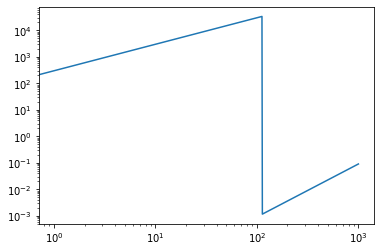

'\nte_ep = rhs*s/(rhg*vth)\nte_sa = 2*rhs*(s**2)/(9*vis)\nte_sb = ((2/vis)**0.6)*(s**1.6)*((rhg*v)**-0.4)*rhs/9\nte_sc = 6*rhs*s/(rhg*v)\n\nvr_ep = vrad(te_ep)\nvr_sa = vrad(te_sa)\nvr_sb = vrad(te_sb)\nvr_sc = vrad(te_sc)\n\nfig1 = plt.figure()\nplt.loglog(s, vr_ep, label="Epstein")\nplt.loglog(s, vr_sa, label="Stokes (Re < 1)")\nplt.loglog(s, vr_sb, label="Stokes (1 < Re < 800)")\nplt.loglog(s, vr_sc, label="Stokes (Re > 800)")\nplt.legend()\nplt.show()\n'

In [2]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Mon Jun 21 16:33:01 2021

@author: mrezky
"""

import math as m
import numpy as np
import matplotlib.pyplot as plt

def vrad(te):
    u = r*te/(r+te**2)
    #u = ((r*m.sqrt(1-dif)/te)-(dif*v))/((v*te/r)+(r/(v*te)))
    return u

s = np.linspace(0, 1000, 1000)

G = 6.674E-8 #cm3 g-1 s-2
M = 1.98847E33 #solar mass in g
r = 1.495978707E13 #cm
rhs = 3 #g cm-3
rhg = 10E-9 #g cm-3
vth = 10E5 #cm s-1
R = 8.314E7 #g cm2 s-2 K-1 mol-1
T = 600 #K
#mp = 1.6726219E-24 #g
nu = 2.3
n = 3

v = m.sqrt(G*M/r)
gam = m.sqrt(G*M/r**3)

ni = 10E12 #cm-3
sgm = 2E-15 #cm2
lam = 1/(ni*sgm)

cs = m.sqrt(R*T/nu)
vis = lam*cs

dif = n*(cs**2)/(v**2)
tp = 2*m.pi*m.sqrt(r**3/(G*M))

u = []

stat = 0
i = 0

while i < len(s):
    if stat == 0:
        if s[i] <= 9*lam/4:
            te = rhs*s[i]/(rhg*vth)
            u.append(vrad(te))
        else:
            te = 2*rhs*(s[i]**2)/(9*vis)
            if te >= tp:
                stat = 1
                te = ((2/vis)**0.6)*(s[i]**1.6)*rhs/(9*((rhg*v)**0.4))
                u.append(vrad(te))
            else:
                u.append(vrad(te))
    else:
        Re = 2*s[i]*rhg*v/vis
        if Re < 800:
            te = ((2/vis)**0.6)*(s[i]**1.6)*((rhg*v)**-0.4)*rhs/9
            u.append(vrad(te))
        else:
            te = 6*rhs*s[i]/(rhg*v)
            u.append(vrad(te))
    i += 1

fig1 = plt.figure()
plt.loglog(s, u)
plt.show()
"""
te_ep = rhs*s/(rhg*vth)
te_sa = 2*rhs*(s**2)/(9*vis)
te_sb = ((2/vis)**0.6)*(s**1.6)*((rhg*v)**-0.4)*rhs/9
te_sc = 6*rhs*s/(rhg*v)

vr_ep = vrad(te_ep)
vr_sa = vrad(te_sa)
vr_sb = vrad(te_sb)
vr_sc = vrad(te_sc)

fig1 = plt.figure()
plt.loglog(s, vr_ep, label="Epstein")
plt.loglog(s, vr_sa, label="Stokes (Re < 1)")
plt.loglog(s, vr_sb, label="Stokes (1 < Re < 800)")
plt.loglog(s, vr_sc, label="Stokes (Re > 800)")
plt.legend()
plt.show()
"""

[answer here]

---
8. To describe the dinamics of solids in the presence of gas, we do not use the size of the solid. We'll use their stopping time. The reason for this is that the aerodynamic properties as a function od their size of the solid are more accurate in gas. To relate the time needed to stop the solid to the Keplerian orbital frequency $\Omega_K$, we use the Stokes number. This is defined as the dimensionless quantity $\tau_s = t_s \Omega_K$, where $t_s$ is the stopping time in seconds. Can you plot the radial drift velocity (again loglog) as a function of Stokes number at 1 AU orbital distance from the star? For which Stokes number does the solid drift the fastest? 

In [ ]:
[code here]

[answer here]

\

---
# Weidenschilling 1977b and related papers (Disk gas profile and behaviour)

1. Can you explain briefly what motivates the power law assumption for the surface density profile?

Weidenschilling tried to reconstruct the solar nebula model by spreading the H, He, and Fe (and other notable metals) abundance of each planet to their respective zone limits on the model and then calculate their surface density $\sigma$. The plot formed by $\sigma$ of each planet as a function of radius showed a general trend of $\sigma \propto r^{-3/2}$, which is a power law relation.

---
2. The temperature profile is also assumed to be a simple power law expression in disk radius. Can you explain in general why this could make sense?

We regard the gas inside the disk as an ideal gas, which means that the change in pressure and temperature of the gas will be parallel to each others. We also implies the isothermic nature of the disk, so that the temperature in the vertical column of the disk and the change in temperature only in relation of the radius.

---
Of course the disk is much more complex in reality. But for simplicity, we assume for the coming calculations our disk temperature profile $T(r)$ and our surface density profile $\Sigma(r)$ are given by

> $$ \Sigma (r) = \Sigma_0 \bigg( \frac{r}{1 \ AU} \bigg)^{-3/2}$$

> $$ T(r) = T_0 \bigg( \frac{r}{1 \ AU} \bigg)^{-1/2}$$

with $\Sigma_0 = 1700 \ g \ {cm}^{-2}$ and $T_0 = 200 K$.

---
3. Assume that the pressure profile can also be written as a power law in r,

> $$ P(r) = P_0 \bigg( \frac{r}{1 \ AU} \bigg)^{-n} $$

and the pressure is isotherm, given by $P = \rho_g C_s^2$ and $C_s = \sqrt{RT/\mu}$, with $R$ is the universal gas constant and $\mu$ is the mean molecular weight. What is the value of the exponent $n$?

Use equation 4 from Visser & Ormel (2016) for the gas density and assume you are in the midplane of the disk ($z = 0$).

---
4. What's the difference between an isotherm and an adiabatic pressure profile?

The isothermic profile represent the simplest nebula model, with the temperature only regulated by stellar irradiation so it is relatively uniform across the vertical column of the disk. This means that the local pressure depends only on its radius from the host star and the gas density of the disk.

Meanwhile, the adiabatic profile represent a more complex view on the model. The existance of the diabatic process indicates that there is an active energy transport (radiative) processes happens all across the disk. This means that the gas flows more turbulent than the isothermic model, which made the temperature and pressure of the disk varies greatly. The variety also happens vertically, as it involved a large optical depth between surface $z$ and the mid-plane. Therefore, the pressure profile of this model will depend on its Rosseland opacity, radius from the host star, gas viscosity and gas density.

---
5. Can you find what value $\eta$, the fractional deviation from the Kepler velocity of the gas, has? Use the Weidenschilling (1977a) paper to find usefule relations if necessary.

> $$ \eta = \frac{n \cdot C_s^2}{V_K^2} $$

(complete explanation available on Weidenschilling (1977a) paper's exercise, number 3.)

---
6. How large is the gas "headwind" for a body in Keplerian orbit? Use and motivate appropriate constants and assumptions.

The gas headwind velocity could be described in the expression,

> $$v_{hw} = \eta v_{K} = n \frac{C_s^2}{V_K}.$$

with

> $$ C_s = \sqrt{\frac{k_BT}{\mu}} $$

and

> $$ V_K = \sqrt{\frac{GM}{r}} $$

By assuming the minimum mass Solar nebula (with $M = M_\odot$), so that the $r = 1 \ AU$, $T = 200 K$, $n = 11/4$ (from the previous exercise) and the mean molecular weight $\mu = 2.3 \cdot 10^{-29} \ g$, this equation results in the headwind velocity value of

> $$v_{hw} = 11,108.62 \ cm \ s^{-1}$$